## 2020/W24
### [data world](https://data.world/makeovermonday/2020w24)

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = [10.0, 8.0]


In [4]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/rvtskle5ynqda43berhhy4rpu4odgf')

In [5]:
df['date'] = df['Year'].apply(lambda x: x.split('/')[1])
df['date'] = pd.to_datetime(df['date'])

#### What's dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55135 entries, 0 to 55134
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 55135 non-null  object        
 1   State                55134 non-null  object        
 2   Sport                55135 non-null  object        
 3   Boys School          55130 non-null  float64       
 4   Girls School         55125 non-null  float64       
 5   Boys Participation   55132 non-null  float64       
 6   Girls Participation  55129 non-null  float64       
 7   date                 55135 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 3.4+ MB


#### Whats kind of sports do they participate?

In [7]:
print('Nomber of sports is ', len(df.Sport.unique()))
print(df.Sport.unique())

Nomber of sports is  96
['Adapted Basketball' 'Adapted Bocce - Indoor' 'Adapted Bowling'
 'Adapted Floor Hockey' 'Adapted Soccer' 'Adapted Softball'
 'Adapted Track' 'Adapted Volleyball' 'Adaptive Corn Toss' 'Adaptive Golf'
 'Adaptive Handball' 'Adaptive Strength Training' 'Adaptive Tennis'
 'Air Riflery' 'Archery' 'Badminton' 'Baseball' 'Basketball'
 'Bass Fishing' 'Beach Volleyball' 'Bocce - Outdoor' 'Bowling'
 'Canoe Paddling' 'Competitive Spirit* (Boys who cheer/Girls who cheer)'
 'Crew' 'Cross Country' 'Cycling' 'Dance' 'Dance/Drill'
 'Dance Team, High Kick' 'Dance Team, Jazz' 'Decathlon' 'Drill Team'
 'Equestrian' 'Fencing' 'Field Hockey' 'Figure Skating' 'Flag Football'
 'Football -- 11-Player' 'Football -- 6-player' 'Football -- 8-player'
 'Football -- 9-player' 'Golf' 'Gymnastics' 'Heptathlon' 'Ice Hockey'
 'Judo' 'Kayaking' 'Lacrosse' 'Martial Arts' 'Mixed 6-Coed Volleyball'
 'Mt. Biking' 'Native Youth Olympics' 'Riflery' 'Rock Climbing' 'Rodeo'
 'Roller Hockey' 'Rugby' 'Ryth

In [8]:
df_sum = df.groupby(['date','Sport'], as_index=False).sum()
df_sum.sort_values(['Sport', 'date'], inplace=True)

In [9]:
z_score = lambda x: (x - x.mean()) / x.std()

In [10]:
df_sum

date               Sport  Boys School  Girls School  \
364  2010-01-01  Adapted Basketball         14.0           9.0   
429  2011-01-01  Adapted Basketball         14.0           9.0   
494  2012-01-01  Adapted Basketball         35.0          33.0   
559  2013-01-01  Adapted Basketball         29.0          26.0   
624  2014-01-01  Adapted Basketball         61.0          55.0   
...         ...                 ...          ...           ...   
688  2014-01-01             sailing         20.0          19.0   
757  2015-01-01             sailing         23.0          23.0   
839  2016-01-01             sailing         30.0          27.0   
922  2017-01-01             sailing         31.0          30.0   
1007 2018-01-01             sailing         22.0          20.0   

      Boys Participation  Girls Participation  
364                115.0                 75.0  
429                115.0                 75.0  
494                280.0                215.0  
559                225.0                167.0  
624                477.0                404.0  
...                  ...                  ...  
688                145.0                122.0  
757                151.0                130.0  
839                200.0                184.0  
922                276.0                246.0  
1007               188.0                158.0  

[1094 rows x 6 columns]

In [11]:
df_sum['boys_participation_z'] = df_sum.groupby('Sport')['Boys Participation'].transform(z_score)
df_sum['girls_participation_z'] = df_sum.groupby('Sport')['Girls Participation'].transform(z_score)

#### Calculate rate of change

In [12]:
# Top5 Number of Boys Participation
top5_boys = df_sum.groupby(['Sport']).mean().sort_values(['Boys Participation'], ascending=False).head(5).index.to_list()
print('Boys top5', top5_boys)
# Top5 Number of Boys Participation
top5_girls = df_sum.groupby(['Sport']).mean().sort_values(['Girls Participation'], ascending=False).head(5).index.to_list()
print('Girls top5',top5_girls)

Boys top5 ['Football -- 11-Player', 'Track and Field -- Outdoor', 'Basketball', 'Baseball', 'Soccer']
Girls top5 ['Track and Field -- Outdoor', 'Basketball', 'Volleyball', 'Softball -- Fast Pitch', 'Soccer']


In [20]:
def sport_plot(top, title='', is_save=False):
    df_sum_top = df_sum[df_sum['Sport'].isin(top)]
    color_map = {
        'Soccer': 'red',
                }
    fig, axes = plt.subplots(5, 1, figsize=(10, 20))
    axes[0].set_title(title)
    axes[0].set_xlabel('Date')  # X軸にラベルを追加
    axes[0].set_ylabel('Girls Participation')  # Y軸にラベルを追加
    for idx, s in enumerate(df_sum_top['Sport'].unique()):
        s_fil_df = df_sum_top[df_sum_top['Sport'] == s]
        c = color_map.get(s, 'gray')
        axes[idx].plot(s_fil_df['date'], s_fil_df['girls_participation_z'], label=s, color=c)
        axes[idx].spines['right'].set_visible(False) 
        axes[idx].spines['left'].set_visible(False) 
        axes[idx].spines['top'].set_visible(False)
        axes[idx].spines['bottom'].set_visible(False) # 右の枠を消す
        axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8, edgecolor='w')
        
    if is_save: fig.savefig('sample.png', bbox_inches="tight")

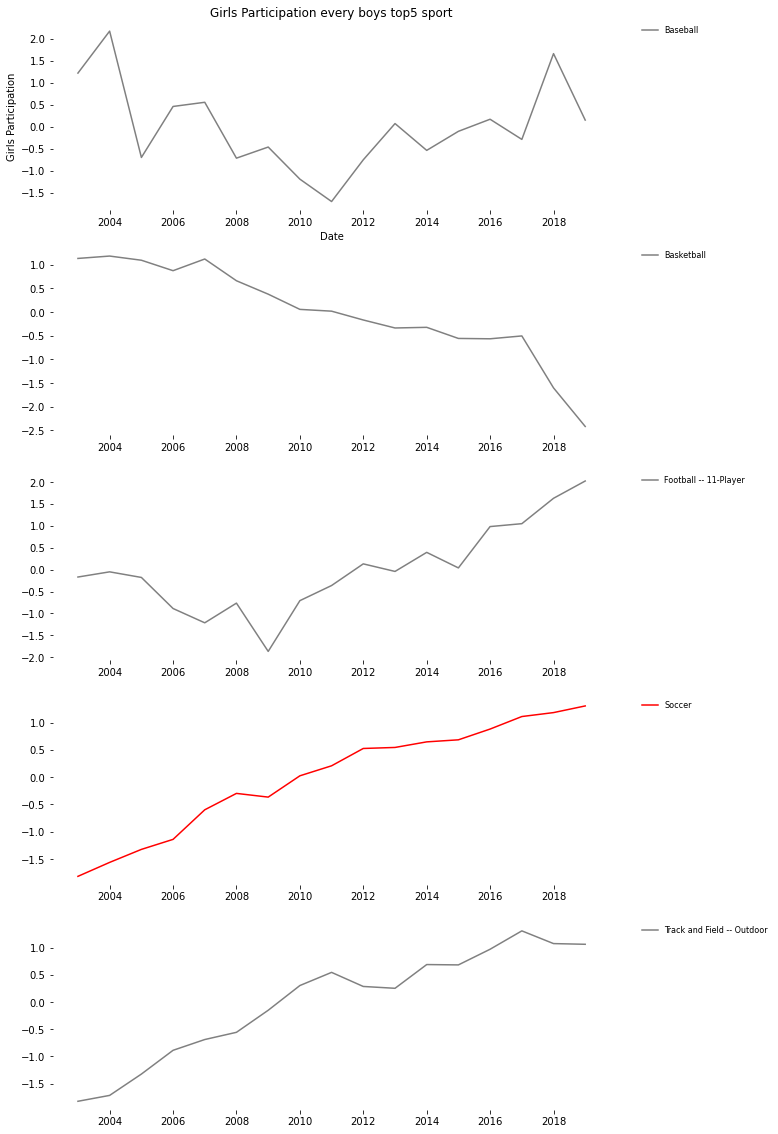

In [23]:
sport_plot(top5_boys, 'Girls Participation every boys top5 sport')

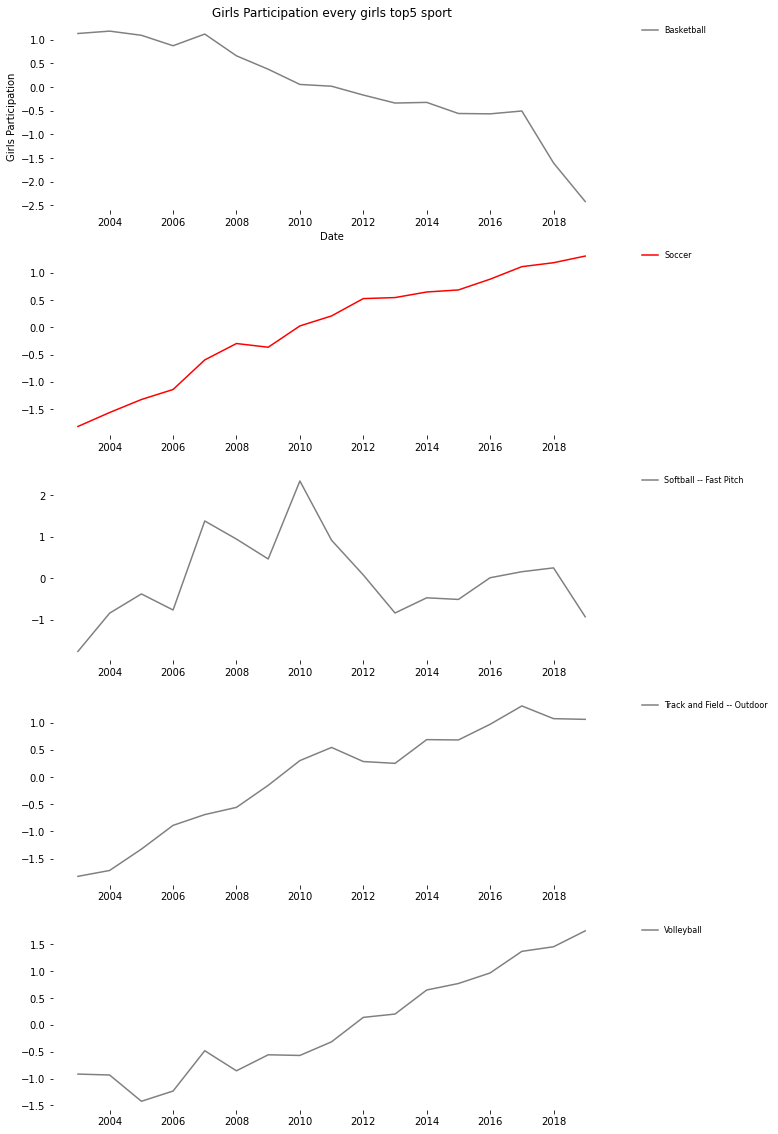

In [24]:
sport_plot(top5_girls, 'Girls Participation every girls top5 sport')